In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
from json import *
from tqdm import tqdm

str_format = '05d'

# Генерация точек

$$\large{
5 \ точек \sim U(100, 1000)
}$$

In [81]:
n = 5
X = np.round(uniform.rvs(loc=100, scale=900, size=n), 3)
Y = np.round(uniform.rvs(loc=100, scale=900, size=n), 3)


# DATA2JSON

In [82]:
data = dict()
for i in range(n):
    data[format(i, str_format)] = {'X':X[i], 'Y':Y[i]}
with open("coordinates.json", "w") as outfile:
    json.dump(data, outfile, indent=4)

# JSON2DATA

In [83]:
with open("coordinates.json") as infile:
    data = load(infile)

In [84]:
N = len(data)
X = np.zeros(N)
Y = np.zeros(N)

for i in range(N):
    X[i] = data[format(i, str_format)]['X']
    Y[i] = data[format(i, str_format)]['Y']

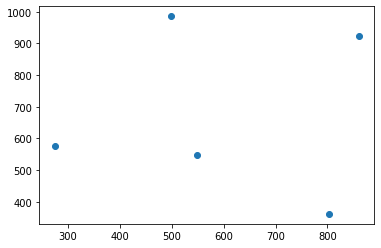

In [85]:
plt.scatter(X,Y)

Схема для построения графа:

$$\Large{
\begin{pmatrix}
\begin{pmatrix}
i-1\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j+1
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j
\end{pmatrix}&&
\begin{pmatrix}
i\\
j
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j-1
\end{pmatrix}\\
\end{pmatrix}
}$$

In [86]:
graph = dict()

k = 0

X_sort = np.sort(X)
Y_sort = np.sort(Y)

for i in tqdm(range(N)):
    for j in range(N):
        i_t = np.where(X_sort == X[i])[0][0]
        j_t = np.where(Y_sort == Y[j])[0][0]
        if i_t == 0 and j_t == 0:
#             print(X_sort, X, X_sort[i_t], Y[j_t], sep='\n')
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                  (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
        elif i_t == 0 and j_t != 0 and j_t != N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t], Y_sort[j_t - 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t - 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5)}
            
        elif i_t == 0 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t != 0 and i_t != N-1 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t+1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t != 0 and j_t != N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t == 0:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t != 0 and i_t != N-1 and j_t == 0:
            graph[(X[i], Y[j])] = {(X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
        elif 0 < i_t < N-1 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                   (X_sort[i_t+1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                   (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
graph

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11567.30it/s]


{(860.538, 924.565): {(860.538, 985.555): 60.989999999999895,
  (802.107, 985.555): 3475.1717610000046,
  (802.107, 924.565): 3414.181761000005,
  (802.107, 577.098): 3761.648761000005,
  (860.538, 577.098): 347.4670000000001},
 (860.538, 361.377): {(860.538, 547.466): 186.089,
  (802.107, 547.466): 3600.2707610000048,
  (802.107, 361.377): 3414.181761000005},
 (860.538, 985.555): {(802.107, 985.555): 3414.181761000005,
  (802.107, 924.565): 3475.1717610000046,
  (860.538, 924.565): 60.989999999999895},
 (860.538, 577.098): {(860.538, 924.565): 347.4670000000001,
  (802.107, 924.565): 3761.648761000005,
  (802.107, 577.098): 3414.181761000005,
  (802.107, 547.466): 3443.813761000005,
  (860.538, 547.466): 29.631999999999948},
 (860.538, 547.466): {(860.538, 577.098): 29.631999999999948,
  (802.107, 577.098): 3443.813761000005,
  (802.107, 547.466): 3414.181761000005,
  (802.107, 361.377): 3600.2707610000048,
  (860.538, 361.377): 186.089},
 (802.107, 361.377): {(860.538, 361.377): 3414

array([274.644, 274.644, 274.644, 274.644, 274.644, 497.924, 497.924,
       548.61 , 548.61 , 802.107, 802.107, 860.538, 860.538, 860.538,
       860.538, 860.538])

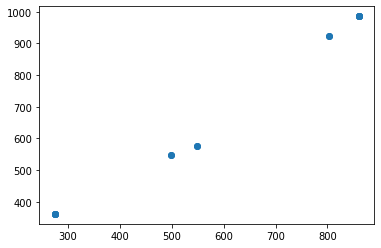

In [87]:
plot_data = np.array(list(graph.keys()))
X_new = plot_data[:, 0]
Y_new = plot_data[:, 1]
plt.scatter(np.sort(X_new), np.sort(Y_new))
np.sort(X_new)

In [88]:
test = np.array([[1,2,3,4],
                 [5,6,7,8]])


# Оформление функций

## DATA2JSON

In [89]:
def DATA2JSON(X, Y, filename, str_format = '05d', digits = 3):
    n = len(X)
    data = dict()
    for i in range(n):
        data[format(i, str_format)] = {'X':round(X[i], digits), 'Y':round(Y[i], digits)}
    with open(filename, "w") as outfile:
        json.dump(data, outfile, indent=4)

In [90]:
X = np.random.uniform(size=4)
Y = np.random.uniform(size=4)
DATA2JSON(X,Y, 'test')

## JSON2DATA

In [91]:
def JSON2DATA(filename, str_format = '05d', digits = 3):
    with open(filename) as infile:
        data = load(infile)
    N = len(data)
    X = np.zeros(N)
    Y = np.zeros(N)

    for i in range(N):
        X[i] = data[format(i, str_format)]['X']
        Y[i] = data[format(i, str_format)]['Y']
    return X,Y

In [92]:
X,Y = JSON2DATA('test')

## Генерация графа

Схема для построения графа:

$$\Large{
\begin{pmatrix}
\begin{pmatrix}
i-1\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j+1
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j
\end{pmatrix}&&
\begin{pmatrix}
i\\
j
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j-1
\end{pmatrix}\\
\end{pmatrix}
}$$

In [93]:
def graph_gen_continious(X,Y, str_format = '05d'):
    graph = dict()
    
    N = len(X)

    k = 0

    X_sort = np.sort(X)
    Y_sort = np.sort(Y)

    for i in tqdm(range(N)):
        for j in range(N):
            i_t = np.where(X_sort == X[i])[0][0]
            j_t = np.where(Y_sort == Y[j])[0][0]
            if i_t == 0 and j_t == 0:
    #             print(X_sort, X, X_sort[i_t], Y[j_t], sep='\n')
                graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),

                                      (X_sort[i_t+1], Y_sort[j_t]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            elif i_t == 0 and 0 < j_t < N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t - 1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t - 1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5)}

            elif i_t == 0 and j_t == N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t-1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}

            elif 0 < i_t < N-1 and 0 < j_t < N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t-1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}

            elif i_t == N-1 and j_t == N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t-1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}

            elif i_t == N-1 and 0 < j_t < N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t+1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t-1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}

            elif i_t == N-1 and j_t == 0:
                graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t+1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}

            elif 0 < i_t < N-1 and j_t == 0:
                graph[(X[i], Y[j])] = {(X_sort[i_t+1], Y_sort[j_t]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t+1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t+1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t+1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
                
            elif 0 < i_t < N-1 and j_t == N-1:
                graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),

                                       (X_sort[i_t-1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t], Y_sort[j_t-1]): 
                                       ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t-1]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),

                                       (X_sort[i_t+1], Y_sort[j_t]): 
                                       ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
    return graph

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10578.32it/s]


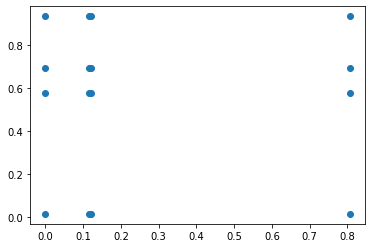

In [94]:
test = graph_gen_continious(X,Y)
sd = np.array(list(test.keys()))
x = sd[:,0]
y = sd[:,1]
plt.scatter(x,y)